In [1]:
### Implementing simple Chatbot Using LangGraph

from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CMTkR1Uwtuhm0fHRxpejiiF0ihsKW', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9d994f05-1c01-4957-a27e-4f8fce573003-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
### We Will start With Creating Nodes
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
   return {"messages":[llm.invoke(state['messages'])]}

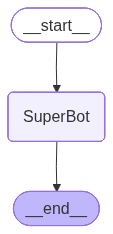

In [6]:
graph=StateGraph(State)
## node
graph.add_node("SuperBot",superbot)
## Edges
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)
graph_builder=graph.compile(checkpointer=memory)
## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [7]:
## Invocation
config = {"configurable": {"thread_id": "1"}}
graph_builder.invoke({'messages':"Hi My name is Sowmya And I like cricket"},config)

{'messages': [HumanMessage(content='Hi My name is Sowmya And I like cricket', additional_kwargs={}, response_metadata={}, id='9971b372-a643-4489-bad1-92cee537704f'),
  AIMessage(content="Hello Sowmya! It's great to meet someone who enjoys cricket. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 18, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CMTnlS4lOZTyft7TfGxxfhqqmSn9h', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--50e2900c-bfc7-4756-95c7-8e0eca4a2bd4-0', usage_metadata={'input_tokens': 18, 'output_tokens': 23, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read

In [8]:
### Streaming 
# Methods: .stream() and astream()
#- These methods are sync and async methods for streaming back results.
# Additional parameters in streaming modes for graph state
# **values** : This streams the full state of the graph after each node is called.
# **updates** : This streams updates to the state of the graph after each node is called.

# Create a thread
config = {"configurable": {"thread_id": "3"}}
for chunk in graph_builder.stream({'messages': "Hi My name is Sowmya And I like cricket"},config,stream_mode="updates"):
        print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hi Sowmya! It's great to meet a fellow cricket fan. Who's your favorite cricketer or team?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 18, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CMTqhkiykIMlFoQAu0P9jf5J5zAdx', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b1692933-037d-48fd-a4ed-38c4d6f524e1-0', usage_metadata={'input_tokens': 18, 'output_tokens': 24, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [9]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="That's awesome, Sowmya! Football is a thrilling sport as well. Do you have a favorite football team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 54, 'total_tokens': 79, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CMTrHwfUqm6IdOIVnaRZVWfmxInQi', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7b43b59c-a355-4ea8-94fd-fef078f9e14f-0', usage_metadata={'input_tokens': 54, 'output_tokens': 25, 'total_tokens': 79, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [10]:
for chunk in graph_builder.stream({'messages':"I Love sports"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi My name is Sowmya And I like cricket', additional_kwargs={}, response_metadata={}, id='652c096d-6071-4527-883f-30c1cfe1bf89'), AIMessage(content="Hi Sowmya! It's great to meet a fellow cricket fan. Who's your favorite cricketer or team?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 18, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CMTqhkiykIMlFoQAu0P9jf5J5zAdx', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b1692933-037d-48fd-a4ed-38c4d6f524e1-0', usage_metadata={'input_tokens': 18, 'output_tokens': 24, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'out

In [11]:
#### Streaming The Responses With astream Method

async for event in graph_builder.astream_events({"messages":["Hi My name is Sowmya and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Sowmya and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '4a41c748-da33-4259-9116-e08b3395c5fe', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi My name is Sowmya And I like cricket', additional_kwargs={}, response_metadata={}, id='652c096d-6071-4527-883f-30c1cfe1bf89'), AIMessage(content="Hi Sowmya! It's great to meet a fellow cricket fan. Who's your favorite cricketer or team?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 18, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chat